### Pt. 3 
##### Neural Network pipeline for Big G's automotive
 * This notebook is specifically for a neural network.  Given the df's size (500k, and 243 columns) you might try to run in google colab...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibrationDisplay
from imblearn.over_sampling import RandomOverSampler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    f1_score, fbeta_score, 
    matthews_corrcoef, brier_score_loss
)
from sklearn.calibration import CalibrationDisplay

from imblearn.over_sampling import RandomOverSampler

In [3]:
#read df in
#For some reason columns (7,12,15,16,18,19,20,21,22,23,25,27,28) have mixed types. Same warning as in pt. 2. to see warning, delete low_memory=False
big_g_df=pd.read_csv('../data/big_g_pipeline_ready.csv')

In [4]:
big_g_df=big_g_df.drop(columns=['Unnamed: 0',
                      ])

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
big_g_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507342 entries, 0 to 507341
Data columns (total 423 columns):
 #    Column            Dtype  
---   ------            -----  
 0    EventTimeStamp_x  object 
 1    1761_1_x          bool   
 2    1761_10_x         bool   
 3    1761_11_x         bool   
 4    1761_17_x         bool   
 5    1761_18_x         bool   
 6    1761_19_x         bool   
 7    1761_3_x          bool   
 8    1761_4_x          bool   
 9    1761_9_x          bool   
 10   3031_18_x         bool   
 11   3031_2_x          bool   
 12   3031_3_x          bool   
 13   3031_4_x          bool   
 14   3031_9_x          bool   
 15   3216_10_x         bool   
 16   3216_11_x         bool   
 17   3216_16_x         bool   
 18   3216_2_x          bool   
 19   3216_20_x         bool   
 20   3216_21_x         bool   
 21   3216_3_x          bool   
 22   3216_4_x          bool   
 23   3216_9_x          bool   
 24   3217_2_x          bool   
 25   3218_2_x          

In [7]:
print(list(big_g_df.columns))

['EventTimeStamp_x', '1761_1_x', '1761_10_x', '1761_11_x', '1761_17_x', '1761_18_x', '1761_19_x', '1761_3_x', '1761_4_x', '1761_9_x', '3031_18_x', '3031_2_x', '3031_3_x', '3031_4_x', '3031_9_x', '3216_10_x', '3216_11_x', '3216_16_x', '3216_2_x', '3216_20_x', '3216_21_x', '3216_3_x', '3216_4_x', '3216_9_x', '3217_2_x', '3218_2_x', '3222_5_x', '3226_10_x', '3226_11_x', '3226_16_x', '3226_2_x', '3226_20_x', '3226_21_x', '3226_4_x', '3226_9_x', '3227_10_x', '3227_21_x', '3228_2_x', '3242_0_x', '3242_15_x', '3242_16_x', '3242_3_x', '3242_4_x', '3246_0_x', '3246_15_x', '3246_16_x', '3246_2_x', '3246_3_x', '3246_4_x', '3251_0_x', '3251_10_x', '3251_15_x', '3251_16_x', '3251_2_x', '3251_3_x', '3251_4_x', '3360_11_x', '3360_12_x', '3360_19_x', '3360_2_x', '3360_9_x', '3361_12_x', '3361_2_x', '3361_3_x', '3361_4_x', '3361_5_x', '3362_31_x', '3362_7_x', '3363_16_x', '3363_3_x', '3363_4_x', '3363_5_x', '3363_7_x', '3364_10_x', '3364_11_x', '3364_18_x', '3364_3_x', '3364_9_x', '3480_17_x', '3480_2_

In [8]:
features = ['1761_1_x', '1761_10_x', '1761_11_x', '1761_17_x', '1761_18_x', '1761_19_x', '1761_3_x', '1761_4_x', '1761_9_x', 
            '3031_18_x', '3031_2_x', '3031_3_x', '3031_4_x', '3031_9_x', '3216_10_x', '3216_11_x', '3216_16_x', '3216_2_x', '3216_20_x', 
            '3216_21_x', '3216_3_x', '3216_4_x', '3216_9_x', '3217_2_x', '3218_2_x', '3222_5_x', '3226_10_x', '3226_11_x', '3226_16_x', 
            '3226_2_x', '3226_20_x', '3226_21_x', '3226_4_x', '3226_9_x', '3227_10_x', '3227_21_x', '3228_2_x', '3242_0_x', '3242_15_x', 
            '3242_16_x', '3242_3_x', '3242_4_x', '3246_0_x', '3246_15_x', '3246_16_x', '3246_2_x', '3246_3_x', '3246_4_x', '3251_0_x', 
            '3251_10_x', '3251_15_x', '3251_16_x', '3251_2_x', '3251_3_x', '3251_4_x', '3360_11_x', '3360_12_x', '3360_19_x', '3360_2_x', 
            '3360_9_x', '3361_12_x', '3361_2_x', '3361_3_x', '3361_4_x', '3361_5_x', '3362_31_x', '3362_7_x', '3363_16_x', '3363_3_x', 
            '3363_4_x', '3363_5_x', '3363_7_x', '3364_10_x', '3364_11_x', '3364_18_x', '3364_3_x', '3364_9_x', '3480_17_x', '3480_2_x', 
            '3480_3_x', '3480_4_x', '3482_2_x', '3482_3_x', '3482_7_x', '3490_3_x', '3490_4_x', '3490_7_x', '3515_10_x', '3521_18_x', 
            '3556_18_x', '3556_2_x', '3556_5_x', '3610_2_x', '3610_3_x', '3610_4_x', '3703_31_x', '3720_15_x', '3936_14_x', '3936_15_x', 
            '3936_16_x', '3936_7_x', '4094_18_x', '4094_31_x', '4096_31_x', '4331_16_x', '4331_18_x', '4334_16_x', '4334_18_x', '4334_2_x', 
            '4334_3_x', '4334_4_x', '4339_7_x', '4340_3_x', '4340_4_x', '4340_5_x', '4342_3_x', '4342_4_x', '4342_5_x', '4344_3_x', '4344_4_x', 
            '4344_5_x', '4346_5_x', '4360_0_x', '4360_10_x', '4360_16_x', '4360_3_x', '4360_4_x', '4363_0_x', '4363_10_x', '4363_16_x', '4363_2_x', 
            '4363_3_x', '4363_4_x', '4364_18_x', '4364_31_x', '4375_2_x', '4375_4_x', '4376_3_x', '4376_4_x', '4376_5_x', '4376_7_x', '4765_16_x',
            '4765_2_x', '4765_3_x', '4765_4_x', '4766_15_x', '4766_3_x', '4792_14_x', '4794_31_x', '4795_31_x', '4796_31_x', '5024_10_x', '5031_10_x',
            '520953_4_x', '521032_14_x', '5246_0', '5246_16_x', '5298_17_x', '5298_18_x', '5319_31_x', '5392_31_x', '5394_3_x', '5394_4_x', '5394_5_x',
            '5394_7_x', '5397_31_x', '5491_3_x', '5491_4_x', '5491_5_x', '5491_7_x', '5569_2_x', '5742_11_x', '5742_12_x', '5742_16_x', '5742_3_x',
            '5742_4_x', '5742_9_x', '5743_11_x', '5743_12_x', '5743_3_x', '5743_4_x', '5743_9_x', '5745_18_x', '5745_3_x', '5745_4_x', '5746_4_x',
            '5835_21_x', '5835_3_x', '5835_4_x', '5835_9_x', '5848_12_x', '5848_13_x', '5848_19_x', '5848_4_x', '5848_9_x', '5851_18_x',
            '5851_2_x', '5853_10_x', '5862_0_x', '5862_16_x', '5862_2_x', '5862_3_x', '5862_4_x', '6773_16_x', '6780_3_x', '6802_31_x',
            '7321_4_x', '7323_4_x', '7854_2_x', '7854_3_x', '7854_4_x', '1761_1_y', '1761_10_y', '1761_11_y', '1761_17_y',
            '1761_18_y', '1761_19_y', '1761_3_y', '1761_4_y', '1761_9_y', '3031_18_y', '3031_2_y', '3031_3_y', '3031_4_y', '3031_9_y', 
            '3216_10_y', '3216_11_y', '3216_16_y', '3216_2_y', '3216_20_y', '3216_21_y', '3216_3_y', '3216_4_y', '3216_9_y', '3217_2_y', 
            '3218_2_y', '3222_5_y', '3226_10_y', '3226_11_y', '3226_16_y', '3226_2_y', '3226_20_y', '3226_21_y', '3226_4_y', '3226_9_y',
            '3227_10_y', '3227_21_y', '3228_2_y', '3242_0_y', '3242_15_y', '3242_16_y', '3242_3_y', '3242_4_y', '3246_0_y', '3246_15_y', 
            '3246_16_y', '3246_2_y', '3246_3_y', '3246_4_y', '3251_0_y', '3251_10_y', '3251_15_y', '3251_16_y', '3251_2_y', '3251_3_y', 
            '3251_4_y', '3360_11_y', '3360_12_y', '3360_19_y', '3360_2_y', '3360_9_y', '3361_12_y', '3361_2_y', '3361_3_y', '3361_4_y', 
            '3361_5_y', '3362_31_y', '3362_7_y', '3363_16_y', '3363_3_y', '3363_4_y', '3363_5_y', '3363_7_y', '3364_10_y', '3364_11_y', 
            '3364_18_y', '3364_3_y', '3364_9_y', '3480_17_y', '3480_2_y', '3480_3_y', '3480_4_y', '3482_2_y', '3482_3_y', '3482_7_y', 
            '3490_3_y', '3490_4_y', '3490_7_y', '3515_10_y', '3521_18_y', '3556_18_y', '3556_2_y', '3556_5_y', '3610_2_y', '3610_3_y', 
            '3610_4_y', '3703_31_y', '3720_15_y', '3936_14_y', '3936_15_y', '3936_16_y', '3936_7_y', '4094_18_y', '4094_31_y', '4096_31_y', 
            '4331_16_y', '4331_18_y', '4334_16_y', '4334_18_y', '4334_2_y', '4334_3_y', '4334_4_y', '4339_7_y', '4340_3_y', '4340_4_y', 
            '4340_5_y', '4342_3_y', '4342_4_y', '4342_5_y', '4344_3_y', '4344_4_y', '4344_5_y', '4346_5_y', '4360_0_y', '4360_10_y', 
            '4360_16_y', '4360_3_y', '4360_4_y', '4363_0_y', '4363_10_y', '4363_16_y', '4363_2_y', '4363_3_y', '4363_4_y', '4364_18_y', 
            '4364_31_y', '4375_2_y', '4375_4_y', '4376_3_y', '4376_4_y', '4376_5_y', '4376_7_y', '4765_16_y', '4765_2_y', '4765_3_y', 
            '4765_4_y', '4766_15_y', '4766_3_y', '4792_14_y', '4794_31_y', '4795_31_y', '4796_31_y', '5024_10_y', '5031_10_y', '520953_4_y', 
            '521032_14_y', '5298_17_y', '5298_18_y', '5319_31_y', '5392_31_y', '5394_3_y', '5394_4_y', '5394_5_y', '5394_7_y', 
            '5397_31_y', '5491_3_y', '5491_4_y', '5491_5_y', '5491_7_y', '5569_2_y', '5742_11_y', '5742_12_y', '5742_16_y', '5742_3_y', 
            '5742_4_y', '5742_9_y', '5743_11_y', '5743_12_y', '5743_3_y', '5743_4_y', '5743_9_y', '5745_18_y', '5745_3_y', '5745_4_y', 
            '5746_4_y', '5835_21_y', '5835_3_y', '5835_4_y', '5835_9_y', '5848_12_y', '5848_13_y', '5848_19_y', '5848_4_y', '5848_9_y', 
            '5851_18_y', '5851_2_y', '5853_10_y', '5862_0_y', '5862_16_y', '5862_2_y', '5862_3_y', '5862_4_y', '6773_16_y', '6780_3_y', 
            '6802_31_y', '7321_4_y', '7323_4_y', '7854_2_y', '7854_3_y', '7854_4_y']

X = big_g_df[features]
y = big_g_df['5246_0']

# Encode the target variable
le = LabelEncoder().fit(y)
y = le.transform(y)

# Perform a train/test split first
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 321, train_size = 0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, random_state = 321, train_size = 0.6/0.8)

# Then scale the predictors
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
len(features)

421

In [10]:
from keras.layers import Dense

#Start with a sequential model
model = tf.keras.Sequential()

# Then add Dense layer
# See https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model.add(
    tf.keras.layers.Dense(units = 25,
                          input_shape = (len(features),),
                          activation = 'tanh'
                          )
)

# And end with another Dense layer as the output layer.
# It needs one node per target category
# may want to use something different than softmax, per ds article...
# https://en.wikipedia.org/wiki/Softmax_function
model.add(tf.keras.layers.Dense(2, activation = 'softmax', use_bias=True))
#model.add(Dense(2, activation='sigmoid'))

# Finally, compile the model
# We need to use sparse categorical crossentropy since our target is encoded as integers
# We can also give one or more metrics we want to track as we train out model.
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10550     
                                                                 
 dense_1 (Dense)             (None, 2)                 52        
                                                                 
Total params: 10602 (41.41 KB)
Trainable params: 10602 (41.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
9513/9513 [==============================] - 21s 2ms/step - loss: 0.0243 - accuracy: 0.9940
Epoch 2/10
9513/9513 [==============================] - 19s 2ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 3/10
9513/9513 [==============================] - 15s 2ms/step - loss: 4.7537e-04 - accuracy: 0.9999
Epoch 4/10
9513/9513 [==============================] - 16s 2ms/step - loss: 2.4807e-04 - accuracy: 0.9999
Epoch 5/10
9513/9513 [==============================] - 21s 2ms/step - loss: 1.4838e-04 - accuracy: 1.0000
Epoch 6/10
9513/9513 [==============================] - 14s 2ms/step - loss: 1.1673e-04 - accuracy: 1.0000
Epoch 7/10
9513/9513 [==============================] - 20s 2ms/step - loss: 8.2708e-05 - accuracy: 1.0000
Epoch 8/10
9513/9513 [==============================] - 18s 2ms/step - loss: 7.0783e-05 - accuracy: 1.0000
Epoch 9/10
9513/9513 [==============================] - 23s 2ms/step - loss: 3.5137e-05 - accuracy: 1.0000
Epoch 10/10
9513/9513 [======================

In [13]:
le.classes_

array([False,  True])

In [14]:
model.predict(X_test)

3171/3171 [==============================] - 4s 1ms/step


array([[1.0000000e+00, 3.1590568e-09],
       [1.0000000e+00, 3.1590568e-09],
       [1.0000000e+00, 3.1590568e-09],
       ...,
       [1.0000000e+00, 3.1590568e-09],
       [1.0000000e+00, 3.1590568e-09],
       [1.0000000e+00, 3.1590568e-09]], dtype=float32)

In [15]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_pred

3171/3171 [==============================] - 3s 1ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Confusion Matrix review:
 * Top Left    ==True Positive
 * Bottom Left ==False Positive
 * Top Right   ==False Negative
 * Bottom Right==True Negative

In [16]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101421      0]
 [     0     48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101421
           1       1.00      1.00      1.00        48

    accuracy                           1.00    101469
   macro avg       1.00      1.00      1.00    101469
weighted avg       1.00      1.00      1.00    101469



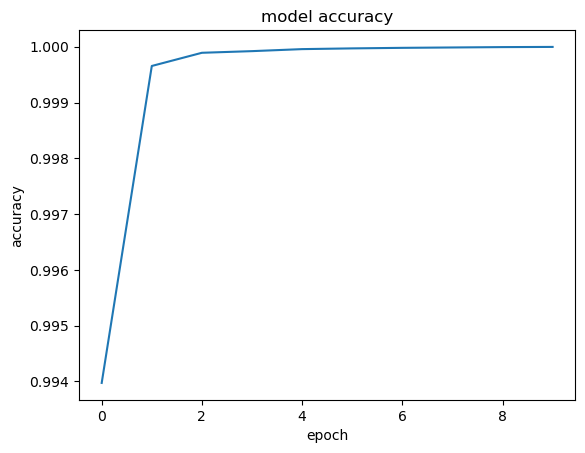

In [17]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch');
#plt.savefig('ta_da!.png')

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
 * Direction and some of the code comes from the above

In [18]:
neg, pos = np.bincount(big_g_df['5246_0'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 507342
    Positive: 240 (0.05% of total)



In [46]:
initial_bias = np.log([pos/neg])
initial_bias

array([-7.65582852])

In [47]:
feat_length=len(features)

In [52]:
model = tf.keras.Sequential()

# Need to define features, I guess...
features_length = len(features)

# Add Dense layer with tanh activation function
model.add(
    tf.keras.layers.Dense(units=2,
                          input_shape=(features_length,),
                          activation='tanh',
                          bias_initializer=tf.keras.initializers.Constant(-1.5)  # Set the initial bias
                          )
)

#maybe try additional hidden layers
bias_initializer=tf.keras.initializers.Constant(-1.5)
model.add(tf.keras.layers.Dense(10, activation='relu', use_bias=True, bias_initializer=bias_initializer))
model.add(tf.keras.layers.Dense(10, activation='relu', use_bias=True, bias_initializer=bias_initializer))

# Custom Bias?
model.add(tf.keras.layers.Dense(10, activation='sigmoid', use_bias=True, bias_initializer=bias_initializer))



In [53]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                4220      
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 4550 (17.77 KB)
Trainable params: 4550 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\micha\anaconda3\Lib\site-packages\keras\src\backend.py", line 5824, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 10) vs (None, 1)).


In [25]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_pred

3171/3171 [==============================] - 4s 1ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

It's making some predictions, but now it's all off...
 * UPDATE: Now its back to not making predictions...What happened? Can't seem to find what happened...

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101420      1]
 [     3     45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101421
           1       0.98      0.94      0.96        48

    accuracy                           1.00    101469
   macro avg       0.99      0.97      0.98    101469
weighted avg       1.00      1.00      1.00    101469



In [27]:
oversampler = RandomOverSampler(random_state = 321)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [28]:
#Note: It's a numpy array, so you can't use .value_counts
unique_values, counts=np.unique(y_resampled, return_counts=True)
value_counts=dict(zip(unique_values, counts))
print(value_counts)

{0: 304260, 1: 304260}


In [29]:
# history = model.fit(X_train, y_train, epochs = 10)
refit=model.fit(X_resampled, y_resampled, epochs = 2);

Epoch 1/2
19017/19017 [==============================] - 65s 3ms/step - loss: 0.0069 - accuracy: 0.9982
Epoch 2/2
19017/19017 [==============================] - 52s 3ms/step - loss: 0.0088 - accuracy: 0.9980


In [32]:
y_pred = refit.predict(X_test)


AttributeError: 'History' object has no attribute 'predict'

In [33]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[101420      1]
 [     3     45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101421
           1       0.98      0.94      0.96        48

    accuracy                           1.00    101469
   macro avg       0.99      0.97      0.98    101469
weighted avg       1.00      1.00      1.00    101469



In [35]:
def test_ratio(ratio):
    oversampler = RandomOverSampler(random_state = 321, sampling_strategy=ratio)
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
    lr_oversampled = model.fit(X_resampled, y_resampled)
    return f1_score(y_val, lr_oversampled.predict(X_val))

ratios = pd.DataFrame({'ratio': np.round(np.arange(start = 0.1, stop = 1.0, step = 0.05), 2)})
ratios['f1'] = ratios['ratio'].apply(test_ratio)
ratios.sort_values('f1', ascending = False).head()

10459/10459 [==============================] - 18s 2ms/step - loss: 0.0087 - accuracy: 0.9956


AttributeError: 'History' object has no attribute 'predict'